<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center><br>
<center>PROJETO 02</center><br>
<center>ALUNO: Wesley Wilson Almeida Araújo</center>
</div>

<b>Links</b><br>
<a href="https://openpolicing.stanford.edu/">Stanford Open Policing Project</a><br>
<a href="https://github.com/stanford-policylab/opp/blob/master/data_readme.md">Descrição das variáveis</a>

<div class="alert alert-block alert-info">
    <b>1. Preparação dos dados para a análise.</b>
     Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de
dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a
correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas
enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project.
</div>

<div class="alert alert-block alert-info">
(a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos
registros policiais estão catalogados;
    </div>

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
police = pd.read_csv('https://raw.githubusercontent.com/wesley1wilson/estatistica-aplicada-a-comp/main/dados/police.csv')

In [356]:
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


O dataset police.csv possui 15 colunas e possui 91741 registros policiais catalogados.

<div class="alert alert-block alert-info">
(b) Conte o número de dados faltosos de cada variável;
    </div>

In [357]:
soma = police.isna().sum()
soma

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

Pra isso eu contei quantos NaN tinha em cada variável, mostrando a lista em todas as variáveis do dataset.

<div class="alert alert-block alert-info">
(c) Como estamos trabalhando somente com dados de um único estado, não faz sentido
mantermos informações de variáveis como county_name e state. Exclua essas variáveis
do conjunto;
    </div>

In [358]:
police = police.drop(columns=['state','county_name'])
police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

O comando drop permite remover essas colunas do nosso arquivo, e permite também remover mais de uma variável indesejada simultaneamente, por isso a utilização dele.

<div class="alert alert-block alert-info">
(d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.
Como apenas uma pequena fração das linhas está faltando driver_gender, remova
essas linhas do conjunto de dados;
    </div>

In [359]:
police = police.dropna(subset=['driver_gender'])

O comando (dropna) permite remover as linhas que estão faltando valores, e de acordo com a documentação do pandas, o parâmetro <i>subset</i> permite definir em qual coluna realizar o comando.

In [360]:
police['driver_gender'].isna().value_counts()

False    86536
Name: driver_gender, dtype: int64

<div class="alert alert-block alert-info">
(e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted,
is_arrested e district; depois compare com os tipos de dados que estão armazenados no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados
para essas variáveis;
</div>

In [361]:
police['search_conducted'].dtype

dtype('bool')

Esse caso não precisa pois retorna um valor verdadeiro ou falso e o booleano serve justamente pra isso.

In [362]:
police['is_arrested'].dtype

dtype('O')

In [363]:
police['is_arrested'] = police['is_arrested'].astype(bool)

In [364]:
police['is_arrested'].dtype

dtype('bool')

O is_arrested precisava mudar pois a variável estava em tipo 'objeto' e eu mudei para booleano, retornando um valor verdadeiro ou falso.

In [365]:
police['district'].dtype

dtype('O')

In [366]:
police['district'] = police['district'].astype("category")

In [367]:
police['district'].dtype

CategoricalDtype(categories=['Zone K1', 'Zone K2', 'Zone K3', 'Zone X1', 'Zone X3',
                  'Zone X4'],
, ordered=False)

Eu achei mais conveniente colocar em categoria pois mesmo que pudesse continuar como objeto, ficaria bem melhor classificado como categoria, afinal, de acordo com a descrição ela se classifica em finitas zonas.

<div class="alert alert-block alert-info">
(f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas:
stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeando-a como stop_datetime e converta no formato data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;
    </div>

In [368]:
police['stop_datetime'] = police[['stop_date', 'stop_time']].apply(' '.join, axis=1)

In [369]:
police['stop_datetime'] = pd.to_datetime(police['stop_datetime'])

In [370]:
police['stop_datetime']

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Name: stop_datetime, Length: 86536, dtype: datetime64[ns]

Para juntar as duas colunas eu usei o join mesmo, mas poderia também ter usado outros métodos (como o +), em seguida eu usei o comando (to_datetime) pois a biblioteca pandas ja consegue transformar isso em data e hora.

<div class="alert alert-block alert-info">
(g) Por fim, transforme a coluna stop_datetime no índice do dataframe.
    </div>

In [371]:
police = police.set_index('stop_datetime')

In [372]:
police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


<div class="alert alert-block alert-info">
    <b>2. Análise do gênero sobre as infrações. </b>O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito?
Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito
mais!</div>

<div class="alert alert-block alert-info">
    (a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os motoristas para obter uma compreensão básica dos dados.
Construa uma distribuição de frequências da variável violation e responda: qual a
infração mais comum e a menos notificada?
</div>

In [373]:
def dist_frequencia_2(var):
    var = var.values.flatten()
    absoluta = pd.value_counts(var)
    relativa = np.around((absoluta/len(var))*100,decimals=2)
    acumulada = np.cumsum(absoluta).astype(int)
    tabela = pd.DataFrame({ 'Fi': absoluta,
                           'Fr': relativa,
                           'Acumulada': acumulada
            })
    return tabela

In [374]:
dist_frequencia_2(police['violation'])

,Fi,Fr,Acumulada
Speeding,48423,55.96,48423
Moving violation,16224,18.75,64647
Equipment,10921,12.62,75568
Other,4409,5.09,79977
Registration/plates,3703,4.28,83680
Seat belt,2856,3.30,86536


A infração mais comum, de acordo com a distribuição de frequência gerada, é por velocidade, sendo representada por 55,96% dos casos e a mais incomum é por cinto de segurança representando 3,30% dos acidentes.

<div class="alert alert-block alert-info">
(b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela
de contingência para frequência absoluta e outra para frequência relativa, contendo a
distribuição conjunta das variáveis driver_gender e violation.
</div>

In [375]:
df2 = police.groupby(['driver_gender', 'violation']).size().unstack(1)
df2.loc['Total',:]= df2.sum(axis=0)
df2.loc[:,'Total'] = df2.sum(axis=1)
df2

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
driver_gender,,,,,,,
F,2501.0,3286.0,707.0,1056.0,578.0,15646.0,23774.0
M,8420.0,12938.0,3702.0,2647.0,2278.0,32777.0,62762.0
Total,10921.0,16224.0,4409.0,3703.0,2856.0,48423.0,86536.0


In [376]:
df2['% Equipment'] =  round(df2['Equipment'] / df2['Total'],6) * 100
df2['% Moving violation'] = round(df2['Moving violation'] / df2['Total'],6) * 100
df2['% Other'] = round(df2['Other'] / df2['Total'],6) * 100
df2['% Registration/plates'] = round(df2['Registration/plates'] / df2['Total'],6) * 100
df2['% Seat belt'] = round(df2['Seat belt'] / df2['Total'],6) * 100
df2['% Speeding'] = round(df2['Speeding'] / df2['Total'],6) * 100
df_filtrado = df2.filter(like='%')
df_filtrado

violation,% Equipment,% Moving violation,% Other,% Registration/plates,% Seat belt,% Speeding
driver_gender,,,,,,
F,10.5199,13.8218,2.9738,4.4418,2.4312,65.8114
M,13.4158,20.6144,5.8985,4.2175,3.6296,52.2243
Total,12.6202,18.7483,5.0950,4.2791,3.3004,55.9571


Para o desenvolvimento dessas colunas, eu usei o (groupby) para usar as duas variáveis, e depois eu adicionei mais colunas representando a porcentagem que cada violation mostrava, em seguida eu passei elas para um novo dataframe para ficar mais fácil de moldá-las de acordo com o que eu quero.

De acordo com essas tabelas, é possível perceber que os números do gênero feminino e do gênero masculino são semelhantes, as maiores disparidades ocorrem nos casos por velocidade que a diferença é de 17131 casos, em que essa causa representa 65,81% dos acidentes causados pelo gênero feminino e 52,22% dos acidentes causados pelo gênero masculino.

<div class="alert alert-block alert-info">
    (c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas
    </div>

In [377]:
df2 = df2.drop(columns=['% Equipment','% Moving violation','% Other','% Registration/plates','% Seat belt','% Speeding','Total'])

Text(0.5, 1.0, 'Survived')

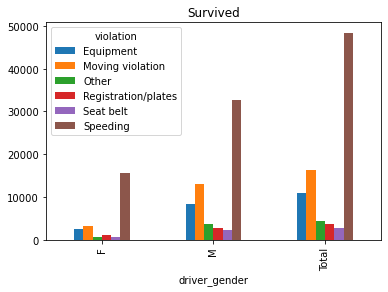

In [378]:
df2.plot.bar()
plt.title('Survived')

Text(0.5, 1.0, 'Survived')

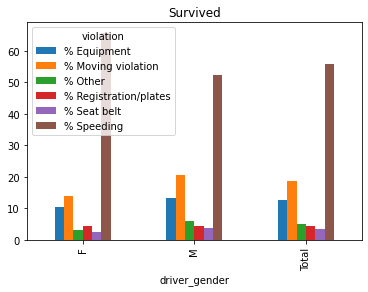

In [379]:
df_filtrado.plot.bar()
plt.title('Survived')

<div class="alert alert-block alert-info">
(d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que
o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar
evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma
tabela de contingência considerando as variáveis driver_gender e stop_outcome e
então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um
"Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);
</div>

In [380]:
df1 = police.groupby(['driver_gender', 'stop_outcome']).size().unstack(1)
df1.loc['Total',:]= df1.sum(axis=0)
df1.loc[:,'Total'] = df1.sum(axis=1)
df1

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning,Total
driver_gender,,,,,,,
F,556.0,113.0,21251.0,168.0,201.0,1485.0,23774.0
M,2179.0,230.0,55840.0,439.0,423.0,3651.0,62762.0
Total,2735.0,343.0,77091.0,607.0,624.0,5136.0,86536.0


In [381]:
df1['% Arrest Driver'] =  round(df1['Arrest Driver'] / df1['Total'],6) * 100
df1['% Arrest Passenger'] = round(df1['Arrest Passenger'] / df1['Total'],6) * 100
df1['% Citation'] = round(df1['Citation'] / df1['Total'],6) * 100
df1['% N/D'] = round(df1['N/D'] / df1['Total'],6) * 100
df1['% No Action'] = round(df1['No Action'] / df1['Total'],6) * 100
df1['% Warning'] = round(df1['Warning'] / df1['Total'],6) * 100
df_filtrado2 = df1.filter(like='%')
df1 = df1.drop(columns=['% Arrest Driver','% Arrest Passenger','% Citation','% N/D','% No Action','% Warning'])
df_filtrado2

stop_outcome,% Arrest Driver,% Arrest Passenger,% Citation,% N/D,% No Action,% Warning
driver_gender,,,,,,
F,2.3387,0.4753,89.3876,0.7067,0.8455,6.2463
M,3.4718,0.3665,88.9710,0.6995,0.6740,5.8172
Total,3.1605,0.3964,89.0855,0.7014,0.7211,5.9351


Com a ajuda das tabelas, é possível notar que o gênero não influencia se a pessoa vai receber uma multa ou não, visto que ambos possuem uma porcentagem parecida, sendo que dá pra notar que os homens possuem uma porcentagem menor de multa ou aviso. E para gerar a tabela eu aproveitei dos mesmos recursos utilizados no quesito anterior.

<div class="alert alert-block alert-info">
(e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta,
primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em
uma revista de veículo;
</div>

In [382]:
df3 = police.groupby(['driver_gender', 'stop_outcome']).size().unstack(1)
df3 = df3.drop(columns = ['No Action','N/D'])
df3.loc['Total',:]= df3.sum(axis=0)
df3.loc[:,'Total'] = df3.sum(axis=1)
df3['% Arrest Driver'] =  round(df3['Arrest Driver'] / df3['Total'],6) * 100
df3['% Arrest Passenger'] = round(df3['Arrest Passenger'] / df3['Total'],6) * 100
df3['% Citation'] = round(df3['Citation'] / df3['Total'],6) * 100
df3['% Warning'] = round(df3['Warning'] / df3['Total'],6) * 100
filt = df3.filter(like='%')
df3 = df3.drop(columns=['% Arrest Driver','% Arrest Passenger','% Citation','% Warning'])
filt.loc[:,'Total'] = filt.sum(axis=1)
filt

stop_outcome,% Arrest Driver,% Arrest Passenger,% Citation,% Warning,Total
driver_gender,,,,,
F,2.3756,0.4828,90.7968,6.3448,100.0000
M,3.5202,0.3716,90.2100,5.8982,100.0000
Total,3.2061,0.4021,90.3710,6.0207,99.9999


Para chegar nesse dataframe, eu criei um novo dataframe, porém eu removi do começo os casos que continham N/D ou No Action, pois a questão pede apenas os que resultaram em uma revista de veículo, usando os recursos das questões anteriores.

Dessa vez, a gente continua vendo os números bem próximos. Entretanto, havemos um destaque na diferença que há que os veículos dirigidos por uma pessoa do gênero feminino possui uma quantidade maior de multas e uma quantidade menor de motoristas presas, enquanto os motoristas do gênero masculino possuem uma porcentagem menor de multas e uma porcentagem maior de motoristas presos.

<div class="alert alert-block alert-info">
(f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo
separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo
tempo usando groupby;
</div>

In [383]:
filtrof = police['driver_gender'] == 'F'
f = police[filtrof]
dff = f.groupby(['driver_gender', 'stop_outcome']).size().unstack(1)

In [384]:
filtrom = police['driver_gender'] == 'M'
m = police[filtrom]
dfm = m.groupby(['driver_gender', 'stop_outcome']).size().unstack(1)

In [385]:
dff.loc['Total',:]= dff.sum(axis=0)
dff.loc[:,'Total'] = dff.sum(axis=1)
dff['% Arrest Driver'] =  round(dff['Arrest Driver'] / dff['Total'],6) * 100
dff['% Arrest Passenger'] = round(dff['Arrest Passenger'] / dff['Total'],6) * 100
dff['% Citation'] = round(dff['Citation'] / dff['Total'],6) * 100
dff['% N/D'] = round(dff['N/D'] / dff['Total'],6) * 100
dff['% No Action'] = round(dff['No Action'] / dff['Total'],6) * 100
dff['% Warning'] = round(dff['Warning'] / dff['Total'],6) * 100
dffiltro = dff.filter(like='%')
dffiltro

stop_outcome,% Arrest Driver,% Arrest Passenger,% Citation,% N/D,% No Action,% Warning
driver_gender,,,,,,
F,2.3387,0.4753,89.3876,0.7067,0.8455,6.2463
Total,2.3387,0.4753,89.3876,0.7067,0.8455,6.2463


In [386]:
dfm.loc['Total',:]= dfm.sum(axis=0)
dfm.loc[:,'Total'] = dfm.sum(axis=1)
dfm['% Arrest Driver'] =  round(dfm['Arrest Driver'] / dfm['Total'],6) * 100
dfm['% Arrest Passenger'] = round(dfm['Arrest Passenger'] / dfm['Total'],6) * 100
dfm['% Citation'] = round(dfm['Citation'] / dfm['Total'],6) * 100
dfm['% N/D'] = round(dfm['N/D'] / dfm['Total'],6) * 100
dfm['% No Action'] = round(dfm['No Action'] / dfm['Total'],6) * 100
dfm['% Warning'] = round(dfm['Warning'] / dfm['Total'],6) * 100
dmfiltro = dfm.filter(like='%')
dmfiltro

stop_outcome,% Arrest Driver,% Arrest Passenger,% Citation,% N/D,% No Action,% Warning
driver_gender,,,,,,
M,3.4718,0.3665,88.971,0.6995,0.674,5.8172
Total,3.4718,0.3665,88.971,0.6995,0.674,5.8172


Nessa questão eu fiz 2 dataframes, cada um contendo apenas um gênero, e pra isso eu tive de filtrá-los, em seguida, eu fiz os cálculos utilizando apenas os dataframes que contém cada gênero separado, permitindo visualizar isso individualmente, notando que não houve diferença nos números.

<div class="alert alert-block alert-info">
(g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a
cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero
e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?
</div>

In [387]:
df_filtrado

violation,% Equipment,% Moving violation,% Other,% Registration/plates,% Seat belt,% Speeding
driver_gender,,,,,,
F,10.5199,13.8218,2.9738,4.4418,2.4312,65.8114
M,13.4158,20.6144,5.8985,4.2175,3.6296,52.2243
Total,12.6202,18.7483,5.0950,4.2791,3.3004,55.9571


O dataframe mostra que possuem números semelhantes, a maior disparidade é por velocidade, que o gênero feminino possui 13% a mais de ocorrências do que as infrações causadas pelo gênero masculino.

<div class="alert alert-block alert-info">
    <b>3. Análise exploratória visual dos dados. </b>
É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas
às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudá-lo a entender
as tendências de uma forma que o exame dos dados brutos não pode.
</div>

<div class="alert alert-block alert-info">
    (a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de
prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em
todas as paradas no DataFrame, calculando a média da coluna is_arrested;
    </div>

In [388]:
TP = police['is_arrested'].mean() * 100
TP.round(2)

3.56

O comando (mean) faz isso bem, ele possibilita calcular a média a taxa de prisão em todas as paradas, e pra mostrar em porcentagem basta multiplicar o número por 100.

<div class="alert alert-block alert-info">
(b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice.
A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso,
agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a
média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate
com os valores encontrados da taxa de prisão por hora
</div>

In [389]:
s = police.groupby(police.index.hour).mean()
hourly_arrest_rate = s['is_arrested']
hourly_arrest_rate.index.rename('Horas',inplace=True)
hourly_arrest_rate

Horas
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

<div class="alert alert-block alert-info">
(c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando
o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora
do Dia;
</div>

<AxesSubplot:title={'center':'Taxa de Prisões por Hora do Dia'}, xlabel='Horas'>

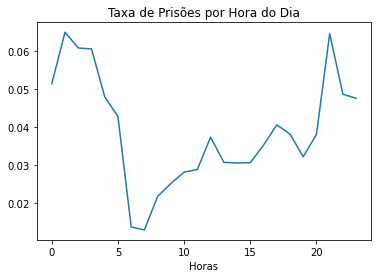

In [390]:
hourly_arrest_rate.plot.line(title='Taxa de Prisões por Hora do Dia')

<div class="alert alert-block alert-info">
d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para
visualizar como a taxa mudou ao longo do tempo;
</div>

In [391]:
b = police.groupby(police.index.month).mean()
bd = b['drugs_related_stop']
bd.index.rename('Meses',inplace=True)
bd

Meses
1     0.009870
2     0.008480
3     0.010775
4     0.010989
5     0.010574
6     0.010191
7     0.013895
8     0.009492
9     0.008919
10    0.010084
11    0.007115
12    0.009119
Name: drugs_related_stop, dtype: float64

<AxesSubplot:xlabel='Meses'>

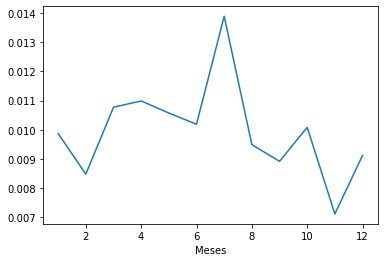

In [392]:
bd.plot.line()

Com esse gráfico, é notável que o mês que mais possui uma maior média de casos com drogas encontrados foi no mês 7, e logo em seguida da uma decaída, mostrando que não estão se tornando mais comum com o tempo.

<div class="alert alert-block alert-info">
(e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.
Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.
Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted
e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e
Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os
dados desse resultado da concatenação;
</div>

In [393]:
Annual_search_rate = police.groupby(police.index.year).mean()
Annual_search_rate.index.rename('Ano',inplace=True)
Annual_search_rate = Annual_search_rate.drop(columns=['is_arrested'])
Annual_search_rate

,search_conducted,drugs_related_stop
Ano,,
2005,0.049167,0.006501
2006,0.041758,0.007258
2007,0.044056,0.007970
2008,0.040310,0.007505
2009,0.049861,0.009889
2010,0.044805,0.010081
2011,0.035682,0.009731
2012,0.033616,0.009921
2013,0.030022,0.013094


<AxesSubplot:xlabel='Ano'>

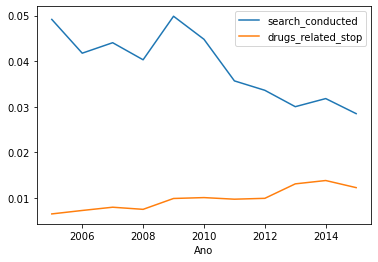

In [394]:
Annual_search_rate.plot.line()

O gráfico mostra exatamente o contrário, seguidamente dos anos, quanto mais tempo passa, menos se tem feito paradas e mais se tem encontrado drogas nas paradas, para isso, eu gerei uma média de quantas paradas e casos com drogas o arquivo continha, e gerei o gráfico disso, podendo visualizar isso melhor para análise.

<div class="alert alert-block alert-info">
    (f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e
violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas
’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados
obtido na tabela, e responda a questão colocada.
</div>

In [395]:
f3 = police.groupby(['district', 'violation']).size().unstack(1)
f3 = f3.filter(like='K',axis=0)
f3

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


<AxesSubplot:xlabel='district'>

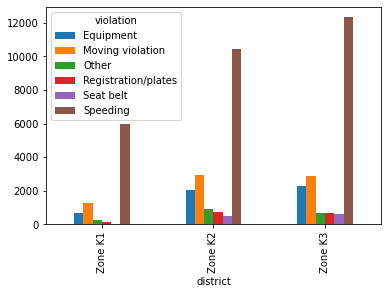

In [396]:
f3.plot.bar()

A zona K1 é a zona que possui a menor quantidade de casos detectados pela polícia, é tanto que não possui nenhum caso detectado com a infração por cinto de segurança, e a zona K3 é a que possui a maior quantidade de casos, e em todas as zonas, o maior motivo de infração é por aceleração. A zona K2 em comparação a zona K3 tem mais infrações por ultrapassagem, documentação (registros e placas) e outros.

<div class="alert alert-block alert-info">
    <b>4. Analisando o efeito do clima no policiamento. </b>
Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar
o impacto das condições meteorológicas no comportamento da polícia durante as paradas de
trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de
dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.
    </div>

<div class="alert alert-block alert-info">
    (a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as
principais medidas resumo usando o comando describe e plote os três boxplots dessas
variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com
base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se
de que a temperatura é medida em graus Fahrenheit, não Celsius!
</div>

In [397]:
weather = pd.read_csv('https://raw.githubusercontent.com/wesley1wilson/estatistica-aplicada-a-comp/main/dados/weather.csv')
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


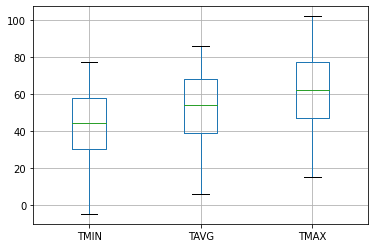

In [399]:
boxplot = weather.boxplot(column=['TMIN', 'TAVG', 'TMAX'])

Com os dados obtidos, pode-se concluir que o lugar que os dados foram coletados é de um lugar muito frio (em comparação com as temperaturas do nordeste brasileiro) e que pela medida ter sido coletado em fahrenheit dá pra concluir que existe uma grande chance de ter sido coletado nos Estados Unidos.

<div class="alert alert-block alert-info">
(b) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as
medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a
distribuição de dados?
</div>

In [400]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
pd.DataFrame(weather['TDIFF'])

,TDIFF
0,18
1,16
2,9
3,6
4,15
...,...
4012,17
4013,14
4014,12
4015,8


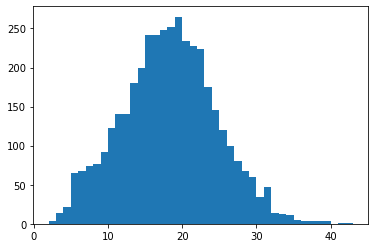

In [401]:
fi, classes, x = plt.hist(weather['TDIFF'], bins='auto')

Com esses dados, pode-se notar que a temperatura costuma variar bastante, o valor que mais é encontrado na variável é 19 graus fahrenheit, o que daria cerca de 10-11 graus celsius, o que geralmente é bastante coisa, e não foi nem o maior valor encontrado, podendo agravar mais ainda a situação bastante calorenta para os nativos.

<div class="alert alert-block alert-info">
    (c) Você agora preparará os DataFrames das abordagens de trânsito e de classificação do
clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame
sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será perdido durante a mesclagem. Com o DataFrame
meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;
</div>

In [402]:
police = police.reset_index()
police

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86531,2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
86532,2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
86533,2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
86534,2015-12-31 22:09:00,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [403]:
date = pd.DataFrame(weather['DATE'])
date

,DATE
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
4012,2015-12-27
4013,2015-12-28
4014,2015-12-29
4015,2015-12-30


<div class="alert alert-block alert-info">
(d) Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna
stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partir
dos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime
novamente como o índice;
    </div>

In [470]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
police['stop_date'] = pd.to_datetime(police['stop_date'])
copia = police.merge(weather, left_on='stop_date', right_on='DATE')
copia = copia.set_index('stop_datetime')
copia

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,23
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,16
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


<div class="alert alert-block alert-info">
    e) A partir desse novo dataframe criado, levante duas questões e as responda usando qualquer técnica que ache necessária.
    </div>

<u>Qual a diferença máxima que a váriável TDIFF que o dataframe weather apresentou?</u>

In [487]:
copia['TDIFF'].value_counts(sort=True,ascending=True).head()

41    29
43    34
39    40
37    58
2     65
Name: TDIFF, dtype: int64

A maior diferença de temperatura foi de 43 graus fahrenheit, e ocorreu 34 vezes durante a coleta de dados.

<u>Qual foi o gênero que mais causou infrações no trânsito?</u>

In [491]:
copia['driver_gender'].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

O gênero que mais causou foi o masculino, com 62762 infrações.